In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
# Load the data

df_disasterlocations = pd.read_csv('../datasets/pend-gdis-1960-2018-disasterlocations.csv')

In [6]:
df_disasterlocations.head()

,id,country,iso3,gwno,year,geo_id,geolocation,level,adm1,adm2,adm3,location,historical,hist_country,disastertype,disasterno,latitude,longitude
0,109,Albania,ALB,339.0,2009,346,Ana E Malit,3,Shkoder,Shkodres,Ana E Malit,Ana E Malit,0,NaN,flood,2009-0631,42.020948,19.418317
1,109,Albania,ALB,339.0,2009,351,Bushat,3,Shkoder,Shkodres,Bushat,Bushat,0,NaN,flood,2009-0631,41.959294,19.514309
2,175,Angola,AGO,540.0,2001,760,Onjiva,3,Cunene,Cuanhama,Onjiva,Onjiva,0,NaN,flood,2001-0146,-17.093484,15.665758
3,187,Angola,AGO,540.0,2009,710,Evale,3,Cunene,Cuanhama,Evale,Evale,0,NaN,flood,2009-0092,-16.531533,15.773987
4,187,Angola,AGO,540.0,2009,749,Mupa,3,Cunene,Cuvelai,Mupa,Mupa,0,NaN,flood,2009-0092,-16.200065,15.844189


In [7]:
df_disasterlocations.columns

Index(['id', 'country', 'iso3', 'gwno', 'year', 'geo_id', 'geolocation',
       'level', 'adm1', 'adm2', 'adm3', 'location', 'historical',
       'hist_country', 'disastertype', 'disasterno', 'latitude', 'longitude'],
      dtype='object')

In [26]:
df_disasterlocations_filtered = df_disasterlocations[['country', 'year', 'geolocation', 'disastertype', 'latitude', 'longitude']]
df_disasterlocations_filtered.head()

,country,year,geolocation,disastertype,latitude,longitude
0,Albania,2009,Ana E Malit,flood,42.020948,19.418317
1,Albania,2009,Bushat,flood,41.959294,19.514309
2,Angola,2001,Onjiva,flood,-17.093484,15.665758
3,Angola,2009,Evale,flood,-16.531533,15.773987
4,Angola,2009,Mupa,flood,-16.200065,15.844189


In [30]:
# Function with all filters

def filter_disasters(df, country, year, disaster_type, geolocation):
    # Check if the country, year, disaster type and geolocation are not None
    if country is not None:
        df = df[df['country'] == country]
    if year is not None:
        df = df[df['year'] == year]
    if disaster_type is not None:
        df = df[df['disastertype'] == disaster_type]
    if geolocation is not None:
        df = df[df['geolocation'] == geolocation]
    return df

# Using kwargs to pass the filters

def filter_disasters_kwargs(df, **kwargs):
    # Check if the country, year, disaster type and geolocation are not None
    for key, value in kwargs.items():
        if value is not None:
            df = df[df[key] == value]
    return df

In [24]:
filter_disasters(df_disasterlocations_filtered, country = 'Colombia', year = 1992, disastertype = 'earthquake', geolocation = 'Medellin')

TypeError: filter_disasters() got an unexpected keyword argument 'disastertype'

In [34]:
country, year, disastertype, geolocation = 'Colombia', 1992, 'earthquake', 'Medellin'

filter_disasters_kwargs(df_disasterlocations_filtered, country = country, year = year, disastertype = disastertype, geolocation = geolocation)

,country,year,geolocation,disastertype,latitude,longitude
2430,Colombia,1992,Medellin,earthquake,6.265727,-75.633836


In [29]:
df_disasterlocations_filtered

,country,year,geolocation,disastertype,latitude,longitude
0,Albania,2009,Ana E Malit,flood,42.020948,19.418317
1,Albania,2009,Bushat,flood,41.959294,19.514309
2,Angola,2001,Onjiva,flood,-17.093484,15.665758
3,Angola,2009,Evale,flood,-16.531533,15.773987
4,Angola,2009,Mupa,flood,-16.200065,15.844189
...,...,...,...,...,...,...
39948,Dominica,2015,Saint Patrick,storm,15.282063,-61.291589
39949,Dominica,2015,Saint Andrew,storm,15.541065,-61.350601
39950,Dominica,2015,Saint George,storm,15.308003,-61.343527
39951,Dominica,2015,Saint David,storm,15.413059,-61.282094


In [ ]:
# Functions to give the data

def get_disaster_locations_by_year(year):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['year'] == year].to_json(orient='records')

def get_disaster_locations_by_country(country):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['country'] == country].to_json(orient='records')

def get_disaster_locations_by_disaster_type(disaster_type):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['disastertype'] == disaster_type].to_json(orient='records')

def get_disaster_locations_by_geolocation(geolocation):
    return df_disasterlocations_filtered[df_disasterlocations_filtered['geolocation'] == geolocation].to_json(orient='records')

def get_disaster_locations_by_country_and_year(country, year):
    return df_disasterlocations_filtered[(df_disasterlocations_filtered['country'] == country) & (df_disasterlocations_filtered['year'] == year)].to_json(orient='records')

In [14]:
# Functions to plot the data

def plot_disaster_locations(df, year):
    df_year = df[df['year'] == year]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='longitude', y='latitude', hue='disastertype', data=df_year)
    plt.title(f'Disaster locations in {year}')
    plt.show()

def plot_disaster_locations_by_country(df, year, country):
    df_year_country = df[(df['year'] == year) & (df['country'] == country)]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='longitude', y='latitude', hue='disastertype', data=df_year_country)
    plt.title(f'Disaster locations in {year} in {country}')
    plt.show()

In [ ]:
get_disaster_locations_by_year()

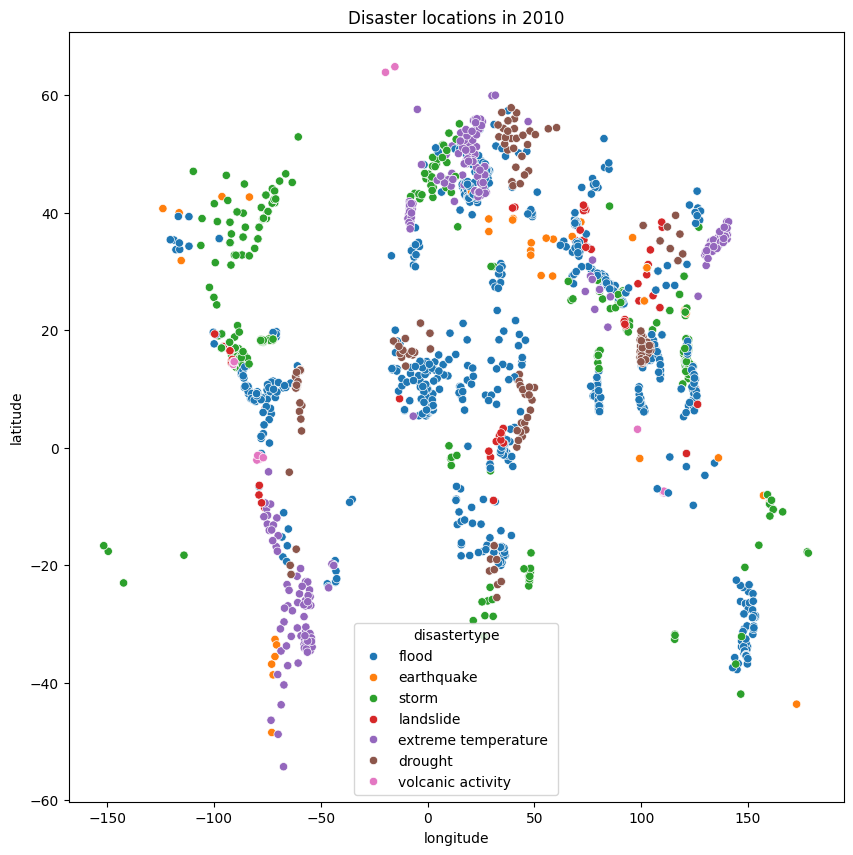

In [12]:
plot_disaster_locations(df_disasterlocations_filtered,2010)

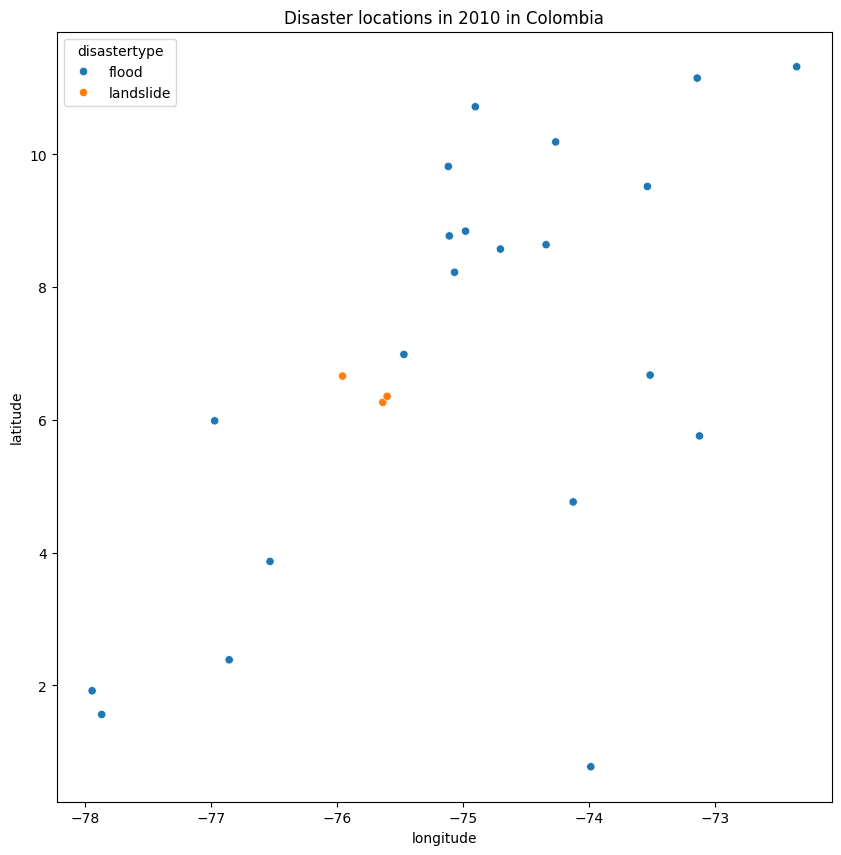

In [15]:
plot_disaster_locations_by_country(df_disasterlocations_filtered, 2010, 'Colombia')